In [1]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [68]:
seed =10
N = 500
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 2
t = np.arange(0,9000,0.1)
K = 6
sum_time = 1500
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega)

In [47]:
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega)


In [10]:
# theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
# qomega = np.sort(omega)-np.mean(omega)

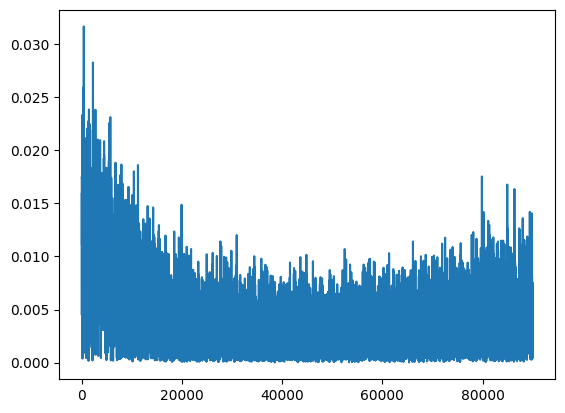

In [69]:
plt.plot(rs)

In [27]:
mean_r

0.6472778354971225

In [65]:
region = rs[-5000:]
mean_r = np.mean(region)
print(mean_r)
max_r,min_r = np.max(region),np.min(region)

0.6416863456440697


In [66]:
O_p = lambda Kr,m=m: (4/np.pi)*np.sqrt(Kr/m)
r_p = lambda O,K=K,m=m: (np.pi/4)**2*m/K*O

-0.05047924903498999
0.05045928153465682
-1.3344829117761503
-0.2920382233560805
0.40647146520535743
1.1160029715770388


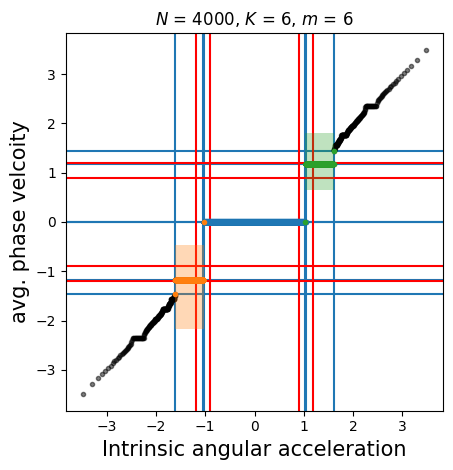

In [67]:
a_dtheta = np.sort(avg_dtheta[-1])
d_region = dtheta[-5000:]
for i,c in enumerate(cluster):
    c = np.sort(c)
    if i ==0:
        mean_o = np.mean(omega[c])
        mean_p = np.mean(a_dtheta[c])
    plt.plot(omega[c],a_dtheta[c],'.')
    plt.axvline(omega[c[0]],zorder=-1)
    plt.fill_between([np.min(omega[c]),np.max(omega[c])],np.min(d_region[:,c]),np.max(d_region[:,c]),alpha=0.3)
    plt.axhline(a_dtheta[c[0]],zorder=-1)
    print(r_p(np.min(d_region[:,c])))
    print(r_p(np.max(d_region[:,c])))

    plt.axhline(a_dtheta[c[-1]],zorder=-1)
    plt.axvline(omega[c[-1]],zorder=-1)
plt.plot(omega,a_dtheta,'.',zorder=0,color ='black',alpha=0.5)
# plt.plot([omega[0],omega[-1]],[omega[0],omega[-1]],lw=5,zorder=0,alpha=0.4)
plt.axvline(O_p(K*min_r),color='red',zorder=0)
plt.axvline(O_p(K*max_r),color='red',zorder=0)
plt.axhline(O_p(K*min_r),color='red',zorder=0)
plt.axhline(O_p(K*max_r),color='red',zorder=0)

plt.axvline(-O_p(K*min_r),color='red',zorder=0)
plt.axvline(-O_p(K*max_r),color='red',zorder=0)
plt.axhline(-O_p(K*min_r),color='red',zorder=0)
plt.axhline(-O_p(K*max_r),color='red',zorder=0)
plt.gca().set_aspect('equal')
plt.xlabel(r'Intrinsic angular acceleration',fontsize=15)
plt.ylabel(r'avg. phase velcoity',fontsize=15)
plt.title(rf'$N$ = {N}, $K$ = {K}, $m$ = {m}')
plt.tight_layout()

In [70]:
2*(0.64+m)

13.28

In [ ]:
plt.plot(m,)

In [23]:
arg = np.argsort(dtheta[-1])

In [24]:
d_region.shape

(5000, 500)

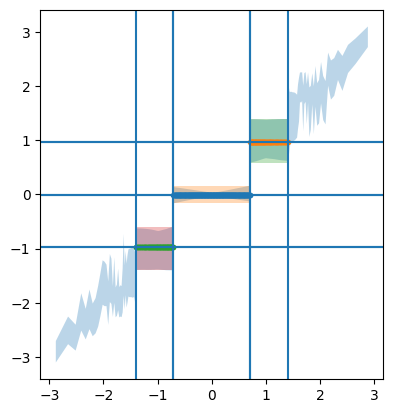

In [25]:
plt.fill_between(omega,np.min(d_region[:,arg],axis=0),np.max(d_region[:,arg],axis=0),alpha=0.3)

for i,c in enumerate(cluster):
    c = np.sort(c)
    if i ==0:
        mean_o = np.mean(omega[c])
        mean_p = np.mean(a_dtheta[c])
    plt.plot(omega[c],a_dtheta[c],'.')
    plt.axvline(omega[c[0]])
    plt.fill_between([np.min(omega[c]),np.max(omega[c])],np.min(d_region[:,c]),np.max(d_region[:,c]),alpha=0.3)
    plt.axhline(a_dtheta[c[0]])

    plt.axhline(a_dtheta[c[-1]])
    plt.axvline(omega[c[-1]])
plt.gca().set_aspect('equal')

In [155]:
I,J = np.meshgrid(avg_dtheta[-1],avg_dtheta[-1])
A = I-J

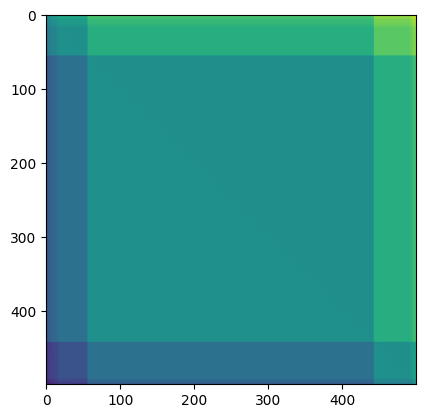

In [17]:
plt.imshow(A)

In [18]:
w,v = np.linalg.eig(A)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


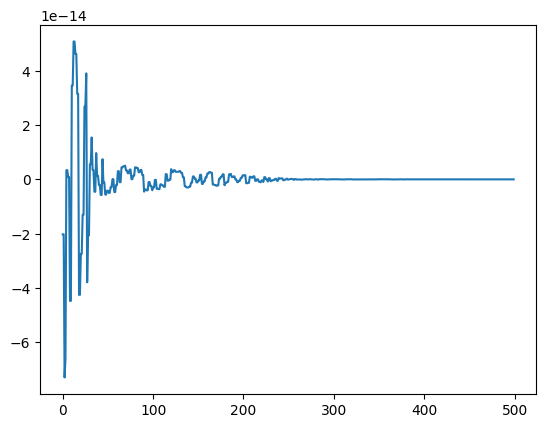

In [19]:
plt.plot(w)

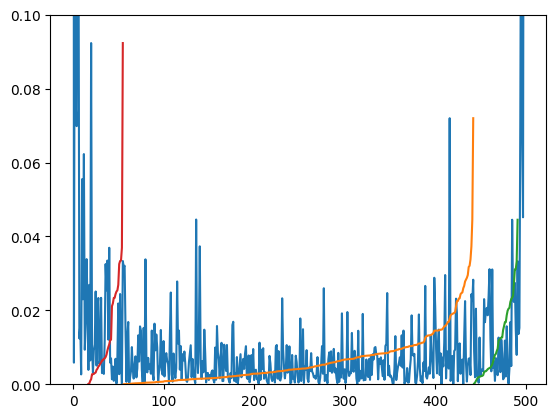

In [47]:
plt.plot(np.diff(omega))
plt.ylim(0,0.1)

for c in cluster:
    plt.plot(np.sort(c),np.sort(np.diff(omega)[c]))
    plt.ylim(0,0.1)

In [48]:
count,hist = np.histogram(omega,bins=20)

In [81]:
plt.hist([omega,qomega],bins=20,density=True)

NameError: name 'qomega' is not defined

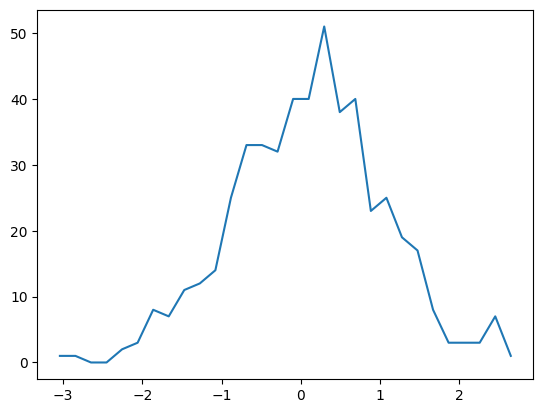

In [21]:
plt.plot(hist[1:],count)

## 09/19 cluster detection with other state $\Omega$

In [2]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2

from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets as mf2_sets
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2_sets_not0 as mf2_sets_TLO
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2

from TO_sim.get_cluster import C_rsmso,cluster_os,C_rsmso_set_new
from TO_sim.To_Draw import Draw_avg_vel_r

max_c = 3e-4

In [99]:
m = 2
# m_set = np.arange(0.1,10+0.1/2,0.2).reshape(-1,1)
K = 4
seed = 100
N = 5000
theta_init,omega,Kc = Normal(N,0,1,seed=seed)
N_set = 50
omega = np.sort(omega) - np.mean(omega)
theta_sets = (np.ones((N_set,1))*theta_init)
# theta_sets = (np.ones((N_set,1))*np.ones_like(theta_init))
omega_sets_temp = (np.ones((N_set,1))*np.zeros_like(omega))

for i in range(N_set):
    theta_init,omega,Kc = Normal(N,0,1,seed=i)
    omega = np.sort(omega) - np.mean(omega)
    omega_sets_temp[i] = omega
omega_sets = omega_sets_temp

# m = 10
t_end = 5000
dt =0.1
t = np.arange(0,t_end,dt)
theta_set, dtheta_set,rs = mf2_sets_TLO(m_set = m,N=N,K=K,t_array=t,p_theta=theta_sets,p_dtheta= 0*omega_sets,p_omega=omega_sets,result_time=int((t_end-350)*(1/dt)))

In [100]:
rs_ = rs.T[0].T

In [101]:
sum_time = 2000
r_mean = np.array([np.mean(rs_[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs_[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
dtheta_c = np.cumsum(dtheta_set,axis=0)
avg_dtheta_set = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

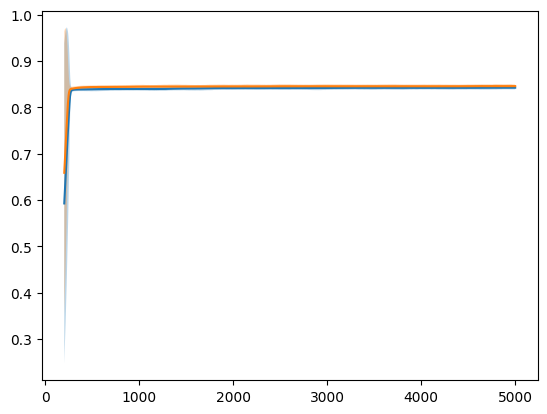

In [102]:
plt.plot(t[sum_time:],r_mean[:,7:9])
for i in range(7,9,1):
    plt.fill_between(t[sum_time:],(r_mean-r_std)[:,i],(r_mean+r_std)[:,i],alpha=0.3)


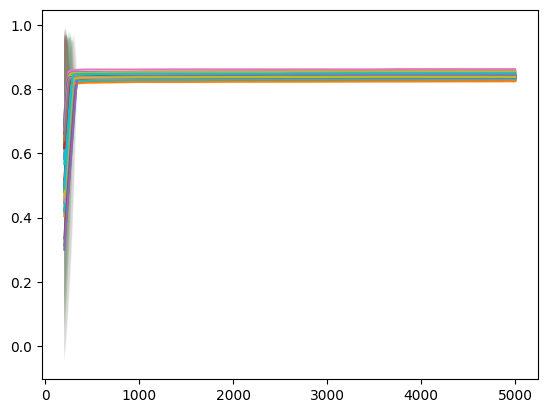

In [103]:
plt.plot(t[sum_time:],r_mean)
for i in range(N_set):
    plt.fill_between(t[sum_time:],(r_mean-r_std)[:,i],(r_mean+r_std)[:,i],alpha=0.1)

In [104]:
dtype = [('cluster size', int), ('cluster mean phase velocity', float)]
CSO_set = []
check_set = [] 
cluster_set = []
Is_group_set = []
c_threshold = np.where(r_mean<0.1,1e-4,3e-4)
error_set = []
# Ks =K_set.reshape(-1)
for i in range(N_set):
    AVG = avg_dtheta_set[-1500:,i]
    c_check = c_threshold[i]
    CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(AVG,height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega_sets[i])

    CSO = np.array([(S,O) for S,O in zip(CS,CMP)],dtype=dtype)
    CSO_set.append(CSO)

print(error_set)

[]


In [105]:
C_0 = [] 
C_1 = [] 
C_2 = [] 

for i in range(N_set):
    A = CSO_set[i]['cluster size']
    if len(A)>=3:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(A[2])

    if len(A)==2:
        C_0.append(A[0])
        C_1.append(A[1])
        C_2.append(0)
    elif len(A)==1:
        C_0.append(A[0])
        C_1.append(0)
        C_2.append(0)
    elif len(A)==0:
        C_0.append(0)
        C_1.append(0)
        C_2.append(0)

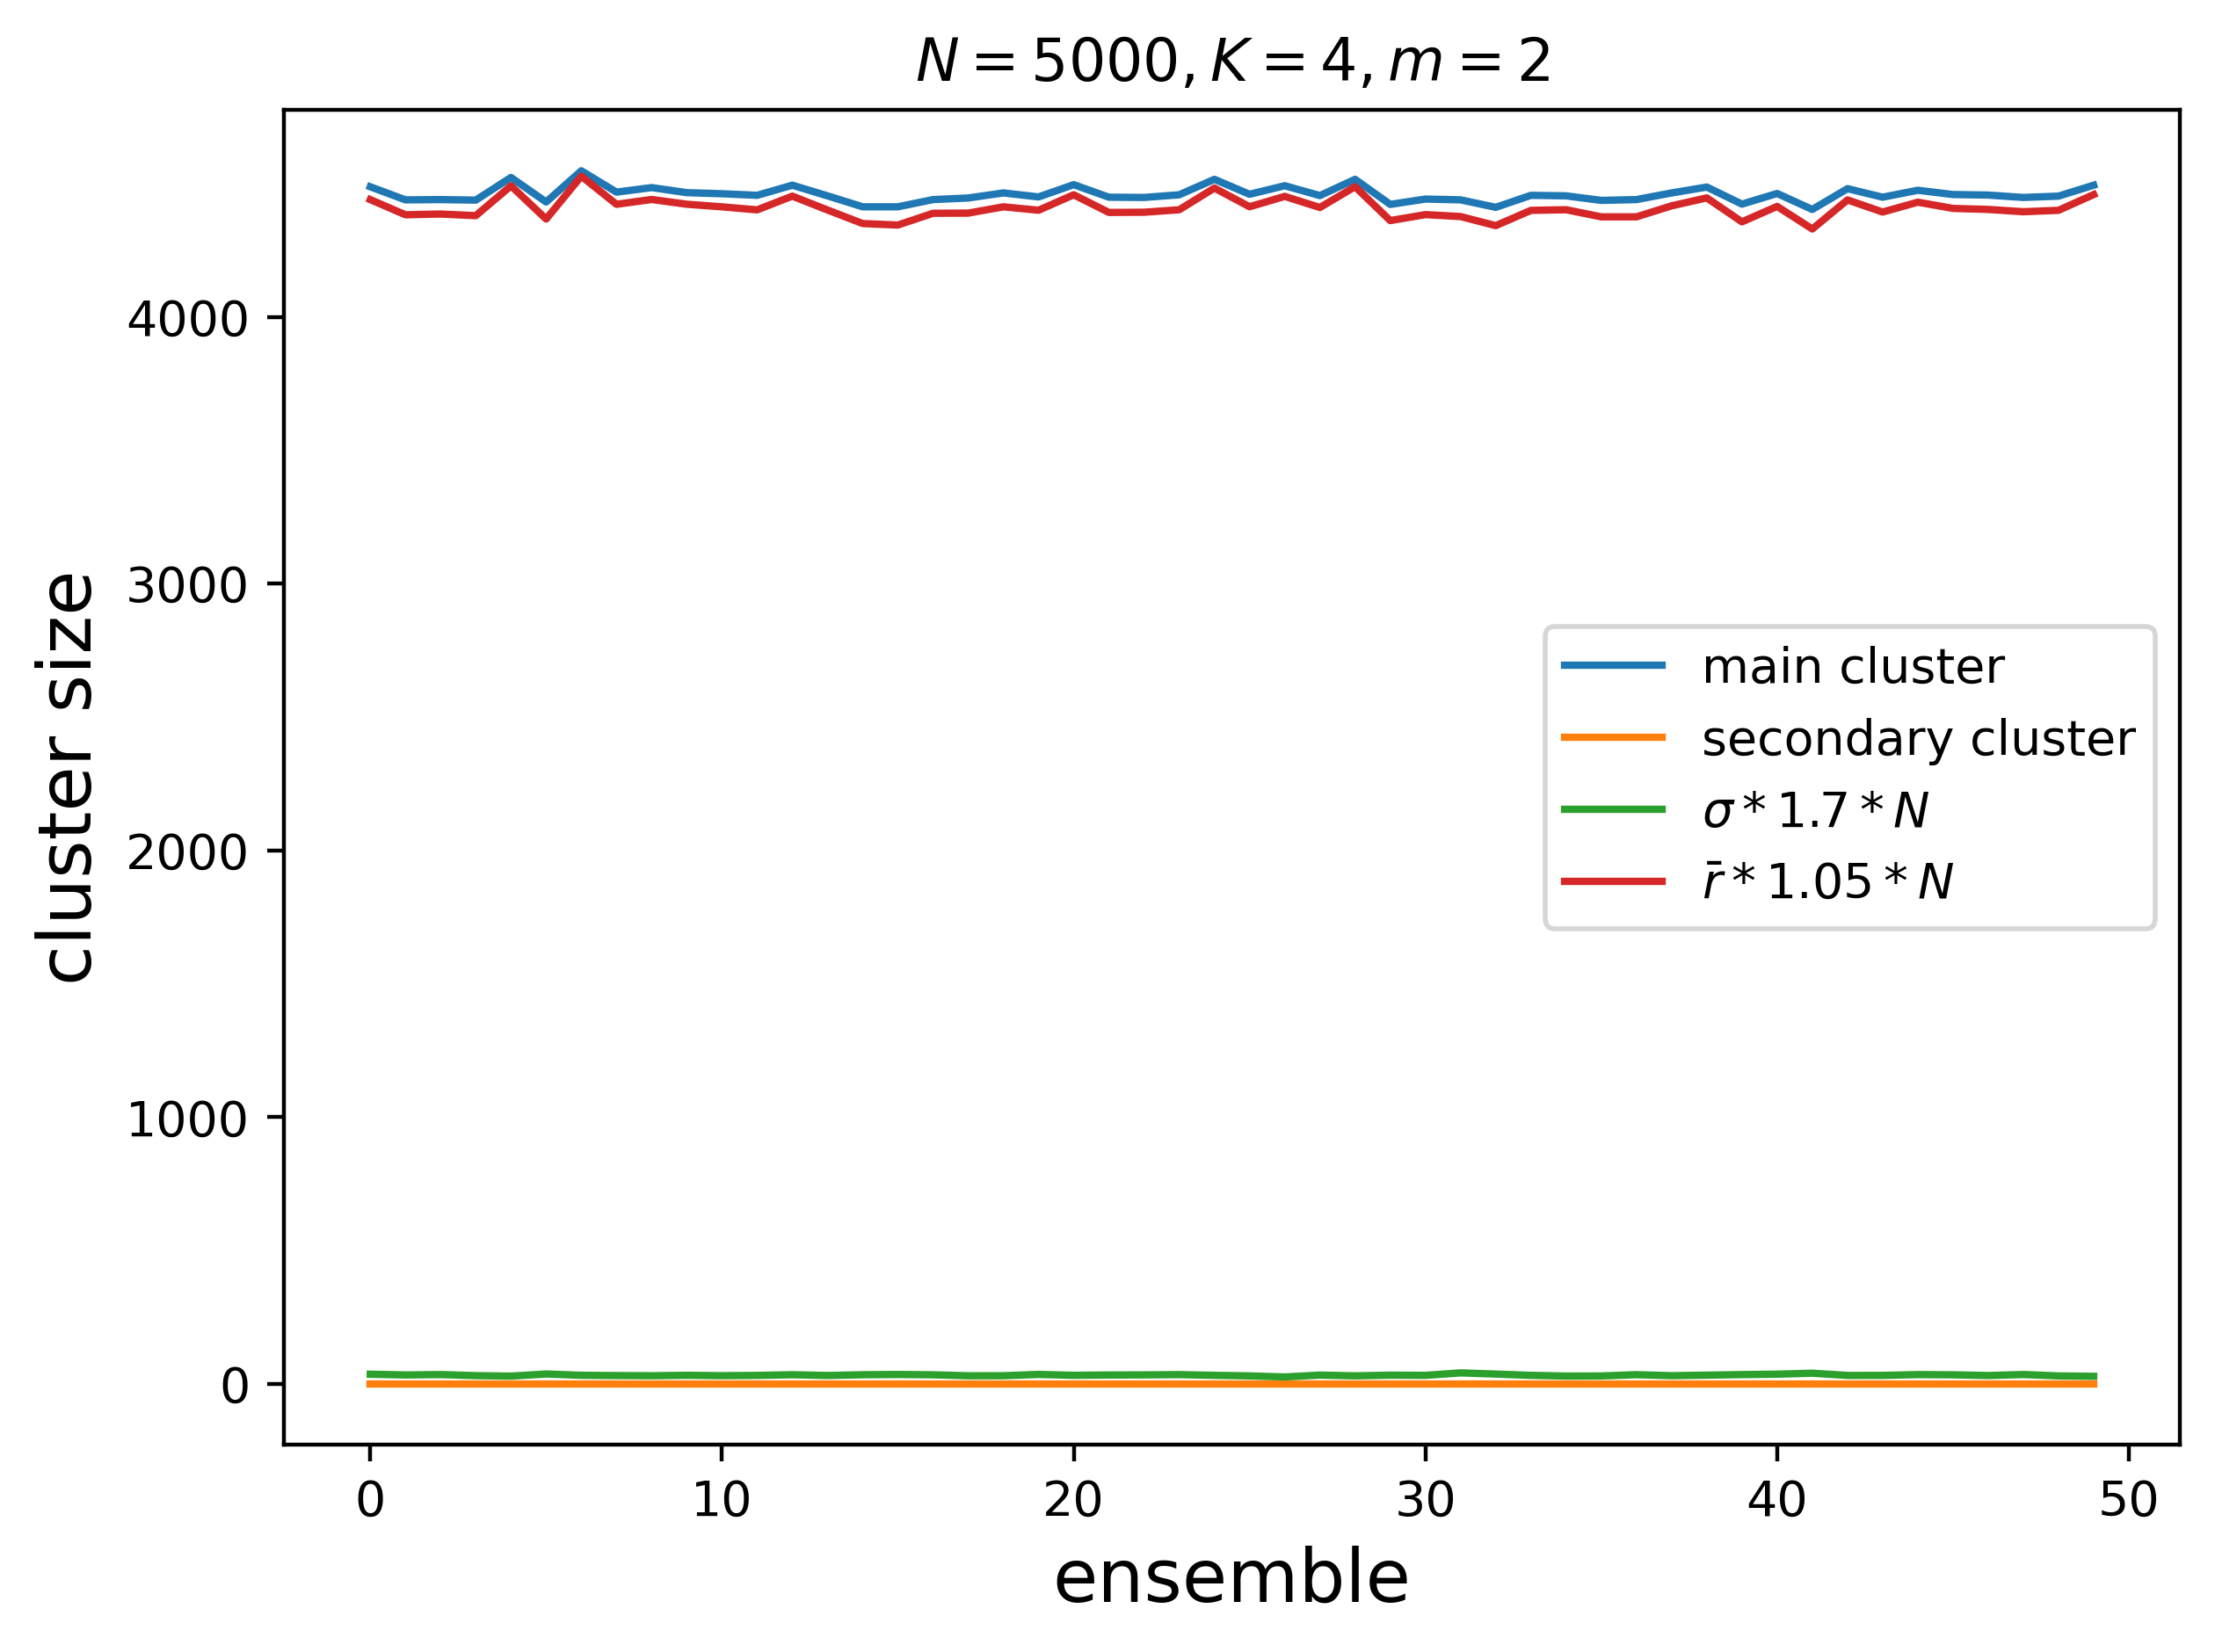

In [106]:
plt.figure(dpi=400)
plt.plot(np.array(C_0),label = 'main cluster')
plt.plot(np.array(C_1) + np.array(C_2),label ='secondary cluster')
# plt.plot(np.array(C_2))
plt.plot(r_std[-1]*1.70*N,label =r'$\sigma*1.7*N$')
plt.plot(r_mean[-1]*1.05*N,label =r'$\bar{r}*1.05*N$')
plt.legend()
plt.ylabel('cluster size',fontsize=15)
plt.xlabel('ensemble',fontsize=15)
plt.title(rf'$N = {N}, K = {K}, m = {m}$')
plt.tight_layout()
plt.show()

In [122]:
1.08**10

2.158924997272788

(-2.0, 2.0)

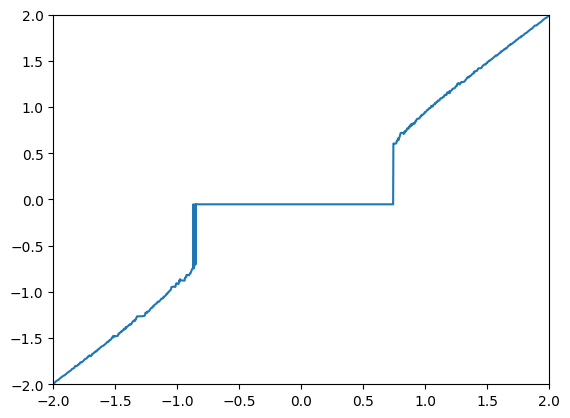

In [144]:
plt.plot(omega_sets[8].T,avg_dtheta_set[-1,8].T)
plt.xlim(-2,2)
plt.ylim(-2,2)

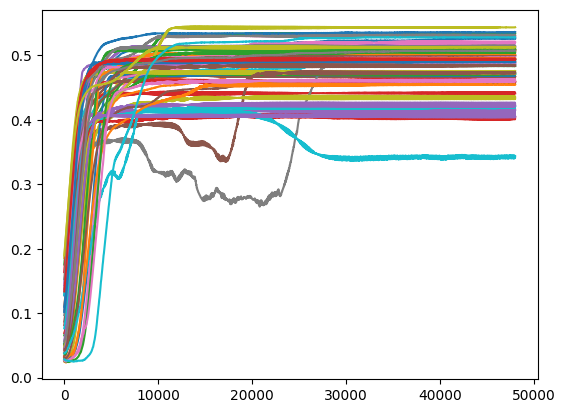

In [145]:
plt.plot(r_mean);

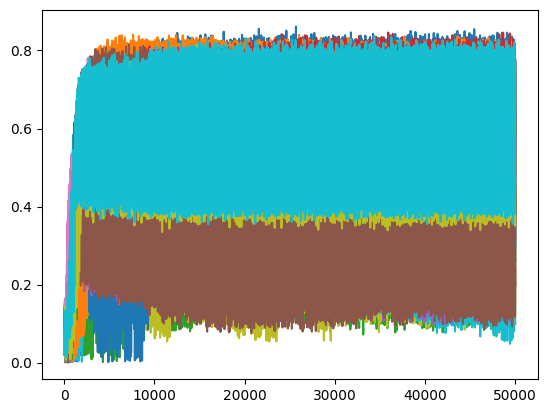

In [50]:
plt.plot(rs_);


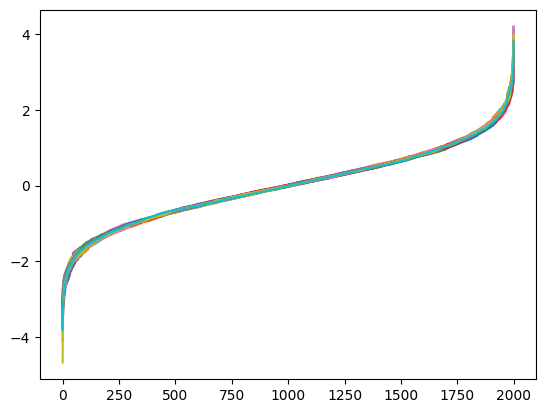

In [146]:
plt.plot(omega_sets_temp.T);

In [ ]:
for i in range(N_set):

In [4]:
omega_sets

(100, 500)

In [ ]:
seed =10
N = 8000
theta_random,omega,Kc = Q_Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0,9000,0.1)
K = 6
sum_time = 1500
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= omega,p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega)

In [ ]:
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=3e-4,c_size=5,N=500,omega=omega)


## Secondary clsuter visualization

In [1]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from scipy.signal import find_peaks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
import numpy as np
import pandas as pd
from TO_sim.get_cluster import cluster_os_new2
max_c = 3e-4

In [365]:
seed =10
N = 2000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 6
t = np.arange(0,9000,0.1)
K = 6
sum_time = 1500
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= 0*omega,p_omega=omega)
# theta = theta[::10]
# dtheta = dtheta[::10]
# t = t[::10]
# rs = rs[::10]

dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)
multi = 1.5


In [366]:
CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=5e-3,c_std = 3,check=1e-4,c_size=5,N=500,omega=omega)
CS

array([1482,  161,  154,   26,   15])

### cluster

In [367]:
import matplotlib.colors as mcl

In [370]:
cluster

array([array([ 267,  273,  274, ..., 1755, 1757, 1762]),
       array([111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
              124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
              137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
              150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
              163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
              176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
              189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 272,
              271, 201, 270, 202, 203, 269, 204, 205, 268, 206, 266, 207, 265,
              264, 263, 208, 209, 210, 262, 261, 211, 260, 212, 259, 213, 258,
              214, 215, 257, 256, 255, 254, 253, 252, 216, 217, 251, 250, 218,
              249, 219, 220, 248, 247, 221, 246, 222, 245, 223, 244, 224, 243,
              242, 241, 240, 225, 239, 238, 237, 226, 236, 235, 234, 227, 

In [382]:
c0,c1,c2 = cluster[:3]

In [383]:
c0 = cluster[0]
# c1 = []
# c2 = []
CLU = np.concatenate([c0,c1,c2])
not_CLU = np.setdiff1d(np.arange(N),CLU)


In [384]:
seg_theta = theta[:5000]
seg_dtheta = dtheta[:5000]
seg_time = t[:5000]
seg_r = rs[:5000]

In [385]:
rpsi = 1/N * np.sum(np.exp(1j*seg_theta),axis=1)
rs = np.abs(rpsi)
psi = np.angle(rpsi)
n_dtheta = seg_dtheta / np.max(abs(seg_dtheta))
def time_oscillator(i,theta = seg_theta,dtheta = seg_dtheta):
    norm = n_dtheta[i]
    A = (1 + (norm)/2)
    theta_ = theta[i] - psi[i]
    sin,cos = A*np.sin(theta_+np.pi/2), A*np.cos(theta_+np.pi/2)
    
    return cos,sin,norm,np.cos(theta_+np.pi/2),np.sin(theta_+np.pi/2)

In [386]:
c_ = np.linspace(-np.pi,np.pi,1000)
circle = {
    'x': np.cos(c_),'y':np.sin(c_)
}

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_72398/3507859052.py:71: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(212)


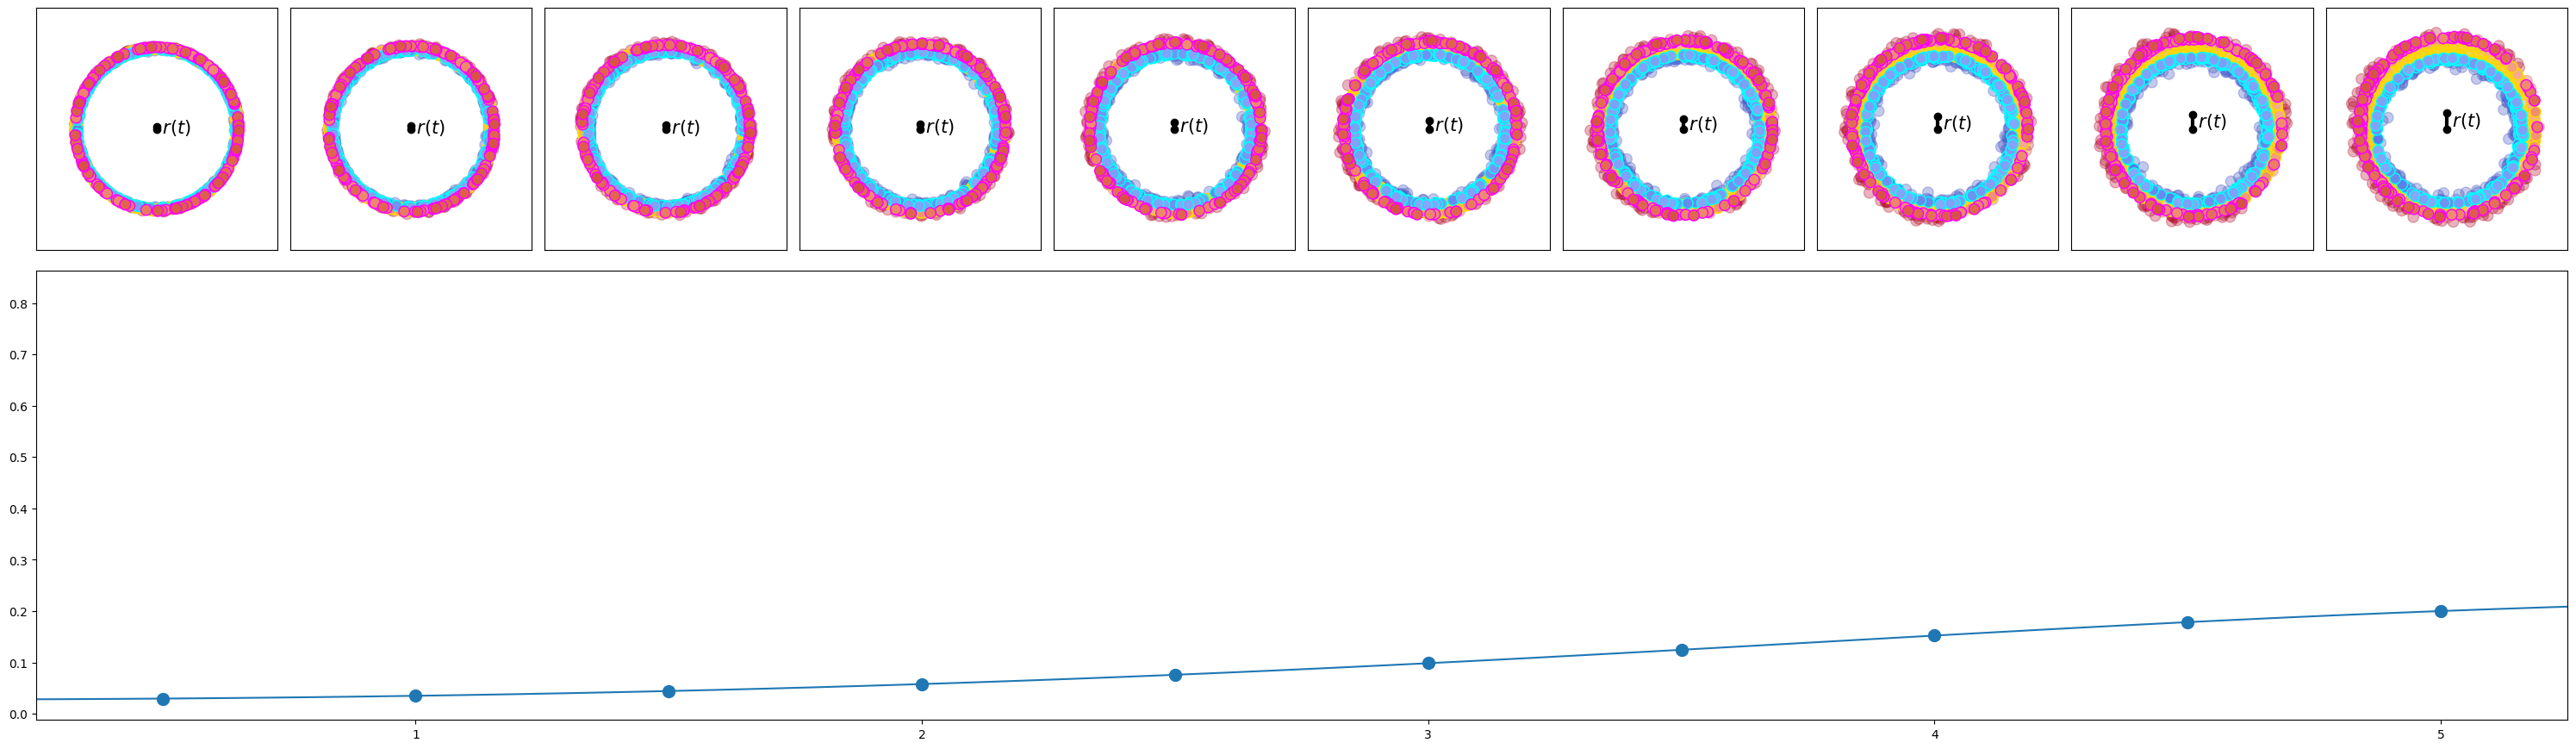

In [387]:
i = -1
fig, axs = plt.subplots(ncols=10, nrows=2, figsize=(5*6, 10),dpi=100,facecolor=(1,1,1,1))
def Make_theta(ax,i):
    plt.sca(ax)
    # colors = ['gold','darkslateblue','darkred']
    colors = ['gold','aqua','fuchsia']

    X,Y,C_,x,y = time_oscillator(i)
    ax.plot([0,np.mean(x)],[0,np.mean(y)],color='black',lw=3,marker='o',zorder=3)
    ax.text(np.mean(x)/2,np.mean(y)/2,' '+r'$r(t)$',horizontalalignment='left', verticalalignment='center',fontsize=15)
    cmap = 'coolwarm'#'Spectral'#'viridis'#
    s = 100
    data = {
        'x': X[not_CLU],'y':Y[not_CLU],
        'c': omega[not_CLU],'s':80,'vmax':2,'vmin':-2,'alpha':0.3,
        'cmap':cmap,
        # 'c': colors,#ome"ga,'cmap':'YlOrRd',
    }
    cax_ = ax.scatter(**data,zorder=1)
    alpha = 1
    alpha_text = f'{round(alpha*255):02x}'
    for clu,color in zip([c0,c1,c2],colors):
        if len(clu)!=0:
            data = {
                'x': X[clu],'y':Y[clu],
                'c': omega[clu],'cmap':cmap,
                'edgecolor':(*mcl.to_rgb(color),alpha),'linewidth':1,'s':80,'vmax':2,'vmin':-2}
            cax = ax.scatter(**data,zorder=1)


    ax.plot(np.cos(c_),np.sin(c_),zorder=0,color=plt.cm.coolwarm(0.5),lw=3,ls='--')
    ax.set_xlim(-1.5,1.5)
    ax.set_ylim(-1.5,1.5)
    # ax.axis('off')

    ax.set_xticks([])
    ax.set_yticks([])
    # ax.text(-1.2,1.0,'(4e)',fontsize=18*multi_)
    plt.tight_layout()
    # ax = plt.gca()
    plt.gca().set_aspect('equal')
    # cbar.ax.plot([0,1],[1]*2,'w')
    # for clu,color in zip([c0,c1,c2],colors):
    
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    return cax
num = 0
for ax in axs[0]:
    num+= 5
    cax = Make_theta(ax,num)

# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# ax.legend([p0,p1,p2],['main cluster',r'secondary cluster $(-)$',r'secondary cluster $(+)$'],loc='lower center', bbox_to_anchor=(0.5, -0.353))
# ax.text(1.4,1.4,r'$t=t_i$',horizontalalignment='right', verticalalignment='top',fontsize=15)
# cbar = plt.colorbar(cax,ax=axs,extend='both',shrink = 0.1,orientation='horizontal',location='bottom',pad=0.01)
# cbar.set_label('$\Omega_i$',rotation=0,fontsize=13)
# for clu,color in zip([c0,c1,c2],colors):

#         if len(clu)!=0:
#         min_c,max_c = np.max(omega[clu]),np.min(omega[clu])
#         cbar.ax.plot([min_c]*2,[0,1],color=color,lw=3)
#         cbar.ax.plot([max_c]*2,[0,1],color=color,lw=3)
#         cbar.ax.plot([min_c,max_c],[0,0],color=color,lw=3)
#         cbar.ax.plot([min_c,max_c],[1,1],color=color,lw=3)
# p0 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.5)[:3],0),edgecolors=colors[0])
# p1 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.3)[:3],0),edgecolors=colors[1])
# p2 = ax.scatter(np.nan,np.nan,s=80,c=(*plt.cm.coolwarm(0.7)[:3],0),edgecolors=colors[2])
# plt.colorbar(cax)
# plt.savefig(f'./DATA_FILE/oscillator_N{N},r_{r[i]}.jpg',dpi=800, transparent=True)
plt.subplot(212)
plt.plot(seg_time,seg_r)
num = 0
for ax in axs[0]:
    num+= 5
    plt.scatter(seg_time[num],seg_r[num],color ='tab:blue',s=100)
plt.xlim(seg_time[0]+0.25,seg_time[num]+0.25)
# num = 100
plt.tight_layout()
# for ax in axs[0]:
#     num+= 5
#     plt.scatter(set_time[num],rs[-1000:][num])
# cax = Make_theta(ax,num)

In [388]:
O_p = lambda Kr,m=m: (4/np.pi)*np.sqrt(Kr/m)
r_p = lambda O,K=K,m=m: (np.pi/4)**2*m/K*O

In [389]:
seg_time.shape
seg_r.shape

(5000,)

In [390]:
K*seg_r.shape

(5000, 5000, 5000, 5000, 5000, 5000)

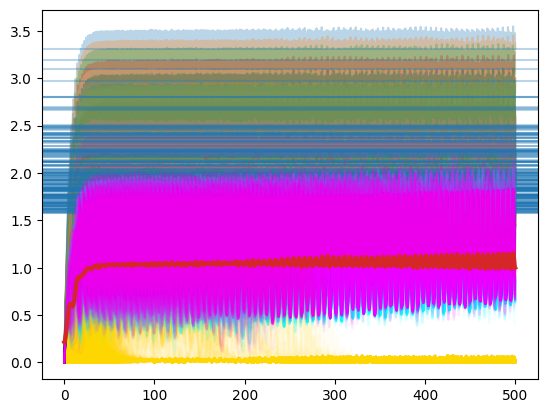

In [392]:
i = 0
for c in cluster[:3]:
    plt.plot(seg_time,abs(seg_dtheta[:,c]),zorder=3,color = colors[i],alpha=0.05)
    # plt.plot(seg_time,abs(omega[c]),*np.ones_like(seg_time),zorder=3,color = colors[i],alpha=0.05)

    i+=1

# plt.plot(seg_time,seg_dtheta[:,not_CLU],alpha=0.3);
# plt.plot(seg_time,abs(seg_dtheta[:,not_CLU]),alpha=0.3);
plt.plot(seg_time,abs(seg_dtheta[:,not_CLU]),alpha=0.3);
plt.plot(seg_time,O_p(K*seg_r,m=m),zorder=4,lw=3)
# i = 0 
# for c in cluster:
#     for num in c:
#         plt.axhline(abs(omega[num]),color= colors[i])
#     i+=1



for num in not_CLU:
    plt.axhline(abs(omega[num]),alpha=0.3)
# i+=1

### 시간에 따른 클러스터 수 구하기

In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from TO_sim.analytical.order_parameter import Make_empirical_KR_0 as KR0,dK_graph,Make_empirical_KR as KR,split_uo
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_mf2 as mf2
from TO_sim.get_cluster import cluster_os_new2
from TO_sim.gen_Distribution import Normal,Quantile_Normal as Q_Normal,Lorentzian


In [12]:
seed =10
N = 1000
theta_random,omega,Kc = Normal(N,0,1,seed=seed)
omega = np.sort(omega)-np.mean(omega)
m = 10
K = 6
t = np.arange(0,15000,0.1)
theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta= 0*omega,p_omega=omega)
sum_time = 2000
dtheta_c = np.cumsum(dtheta,axis=0)
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time
diff_avg_dtheta = np.diff(avg_dtheta,axis=1)

CS,CMP,cluster,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=1e-4,c_size=5,N=500,omega=omega)
CS

array([658, 117, 114])

In [13]:
CS__,CMP,cluster__,omega_s,omega_e,CMO,Is_group,C_s,C_e = cluster_os_new2(avg_dtheta[-1500:],height=1e-2,c_std = 3,check=1e-4,c_size=5,N=500,omega=omega)
CS__

array([658, 117, 114])

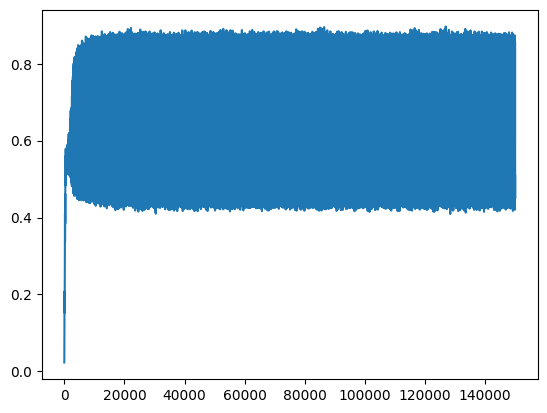

In [14]:
plt.plot(rs)

In [15]:
CS/N

array([0.658, 0.117, 0.114])

In [16]:
np.std(rs[-1500:])*1.8

0.2689951107561862

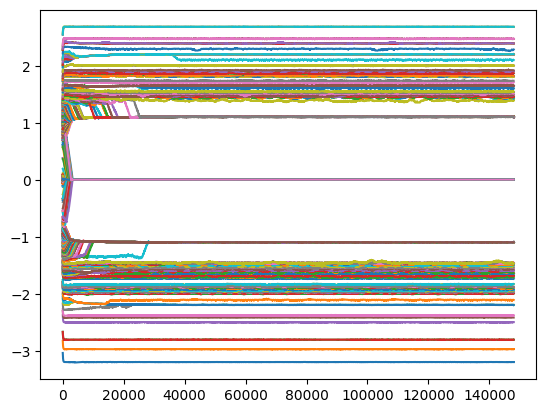

In [17]:
plt.plot(avg_dtheta);

In [18]:
CS

array([658, 117, 114])

In [19]:
sum_time = 500
r_mean = np.array([np.mean(rs[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
r_std = np.array([np.std(rs[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])

In [20]:
CLU = np.concatenate([*cluster])
not_CLU = np.setdiff1d(np.arange(N),CLU)

In [53]:
temp = 1/N*np.sum(np.exp(1j*theta[:,cluster[0]]),axis=1)
temp1 = 1/N*np.sum(np.exp(1j*theta[:,cluster[1]]),axis=1)
temp2 = 1/N*np.sum(np.exp(1j*theta[:,cluster[2]]),axis=1)
# temp3 = 1/N*np.sum(np.exp(1j*theta[:,cluster[3]]),axis=1)
# temp_ = 1/N*np.sum(np.exp(1j*theta[:,cluster[1]-5]),axis=1)


temp_clu = 1/N*np.sum(np.exp(1j*theta[:,CLU]),axis=1)
temp_nclu = 1/N*np.sum(np.exp(1j*theta[:,not_CLU]),axis=1)


In [22]:
r0_s = [] 
r0_stds = [] 
for i in range(-25,25):
    r_0 = abs(1/N*np.sum(np.exp(1j*theta[:,cluster[1]+i]),axis=1))

    r0_mean = np.array([np.mean(r_0[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
    r0_std = np.array([np.std(r_0[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
    r0_s.append(r0_mean)
    r0_stds.append(r0_std)
    # plt.plot(t,,alpha=0.3)

# temp_1 = 1/N*np.sum(np.exp(1j*theta[:,cluster[1]-2]),axis=1)
# temp_2 = 1/N*np.sum(np.exp(1j*theta[:,cluster[1]+2]),axis=1)

# plt.plot(t,abs(temp_0),alpha=0.3)
# plt.plot(t,abs(temp_1),alpha=0.3)
# plt.plot(t,abs(temp_2),alpha=0.3)


In [23]:
r0_stds = np.array(r0_stds)
r0_s = np.array(r0_s)

In [24]:
r0_stds.shape

(50, 149500)

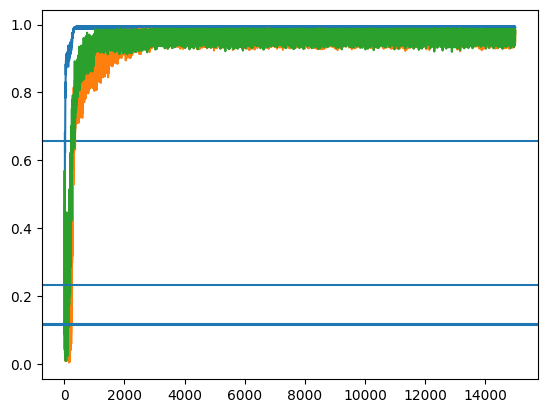

In [25]:
plt.plot(t,abs(temp))
plt.axhline((CS[0])/N)

# plt.twinx()
plt.plot(t,abs(temp1))
plt.plot(t,abs(temp2))
# plt.plot(t,abs(temp2)+abs(temp1))

plt.axhline((CS[1]+CS[2])/N)
plt.axhline((CS[1])/N)
plt.axhline((CS[2])/N)
# plt.plot(t,abs(temp3)+abs(temp2)+abs(temp1))
# plt.plot(t,abs(temp3))
# plt.plot(t,abs(temp_clu))
# plt.plot(t,abs(temp_nclu))
# plt.plot(t[sum_time:],r_mean)
# plt.plot(t[sum_time:],r_std*1.66)
# plt.xscale('log')

(500.0, 550.0)

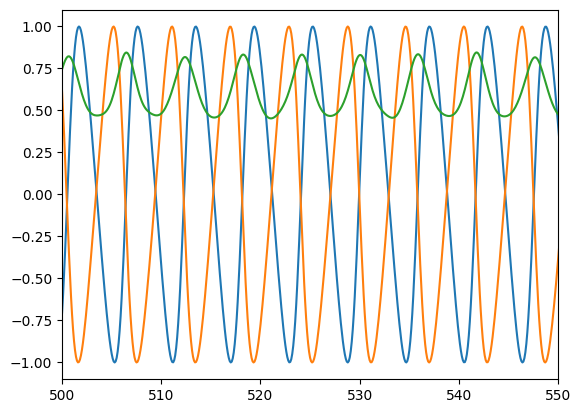

In [26]:
# plt.plot(t,np.sin(np.angle(temp)))
plt.plot(t,np.sin(np.angle(temp1)-np.angle(temp)))
plt.plot(t,np.sin(np.angle(temp2)-np.angle(temp)))
# plt.plot(t,np.sin(np.angle(temp3)))

plt.plot(t,rs)

# plt.plot(t,(np.angle(temp2)+np.angle(temp1)))
# plt.axhline(64)
plt.xlim(500,550)

In [54]:

r1 = abs(temp)
r2 = abs(temp1)
r3 = abs(temp2)


psi1 = np.angle(temp)
psi2 = np.angle(temp1)
psi3 = np.angle(temp2)
# r4 = abs(temp3)

r_clu = abs(temp_clu)
r_nclu = abs(temp_nclu)

In [28]:
sum_time = 500
r1_mean = np.array([np.mean(r1[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
r1_std = np.array([np.std(r1[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])


r2_mean = np.array([np.mean(r2[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
r2_std = np.array([np.std(r2[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])

r3_mean = np.array([np.mean(r3[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
r3_std = np.array([np.std(r3[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])

# r4_mean = np.array([np.mean(r4[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
# r4_std = np.array([np.std(r4[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])


r_clu_mean = np.array([np.mean(r_clu[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
r_clu_std = np.array([np.std(r_clu[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])

r_nclu_mean = np.array([np.mean(r_nclu[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])
r_nclu_std = np.array([np.std(r_nclu[i:i+sum_time],axis=0) for i in range(len(t)-sum_time)])

(10000.0, 10500.0)

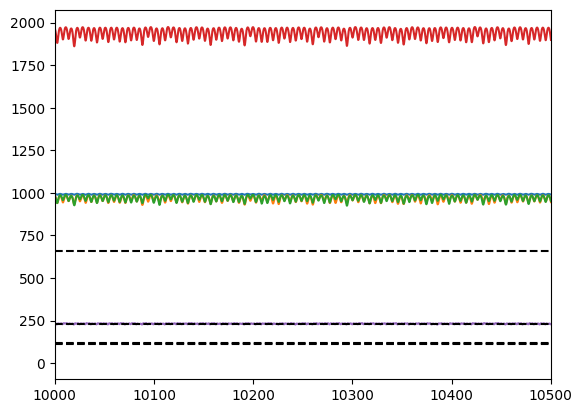

In [29]:
plt.plot(t,r1*N)
plt.plot(t,r2*N)
plt.plot(t,r3*N)
plt.plot(t,(r2+r3)*N)
plt.plot(t[sum_time:],r_std*1.55*N)
# plt.plot(t,(r2+r3+r4)*N)
# plt.plot(t,(r_nclu)*N)
plt.axhline(CS[0],ls='--',color='black')
plt.axhline(CS[1],ls='--',color='black')
plt.axhline(CS[2],ls='--',color='black')
plt.axhline(CS[2]+CS[1],ls='--',color='black')

plt.xlim(10000,10500)
# plt.axhli

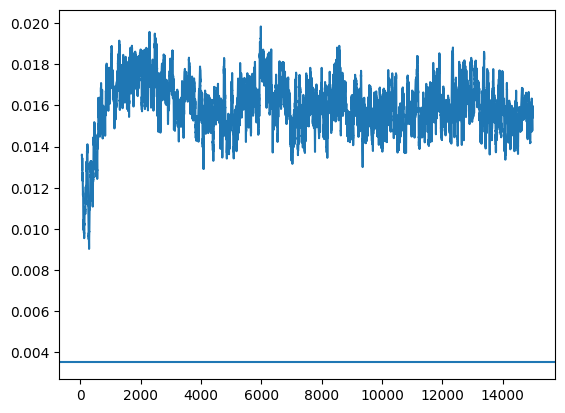

In [30]:
# plt.plot(t,(r_nclu))
plt.plot(t[sum_time:],(r_nclu_mean))
plt.axhline(1/np.sqrt(N)*len(not_CLU)/N)


In [31]:
CS/N

array([0.658, 0.117, 0.114])

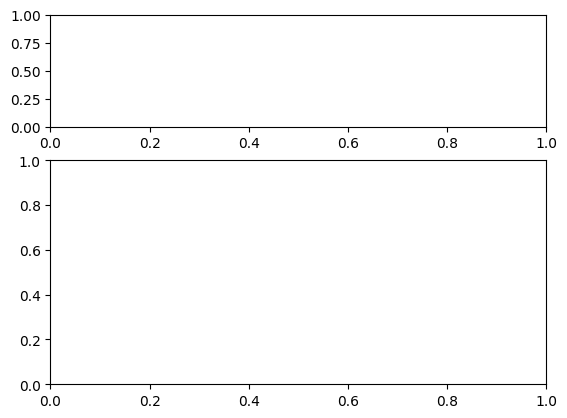

In [32]:
fig, (ax1,ax2) = plt.subplots(2,1,height_ratios=[1, 2])


In [33]:
avg_dtheta.shape

(148000, 1000)

In [34]:
avg_dtheta = (dtheta_c[sum_time:]-dtheta_c[:-sum_time])/sum_time

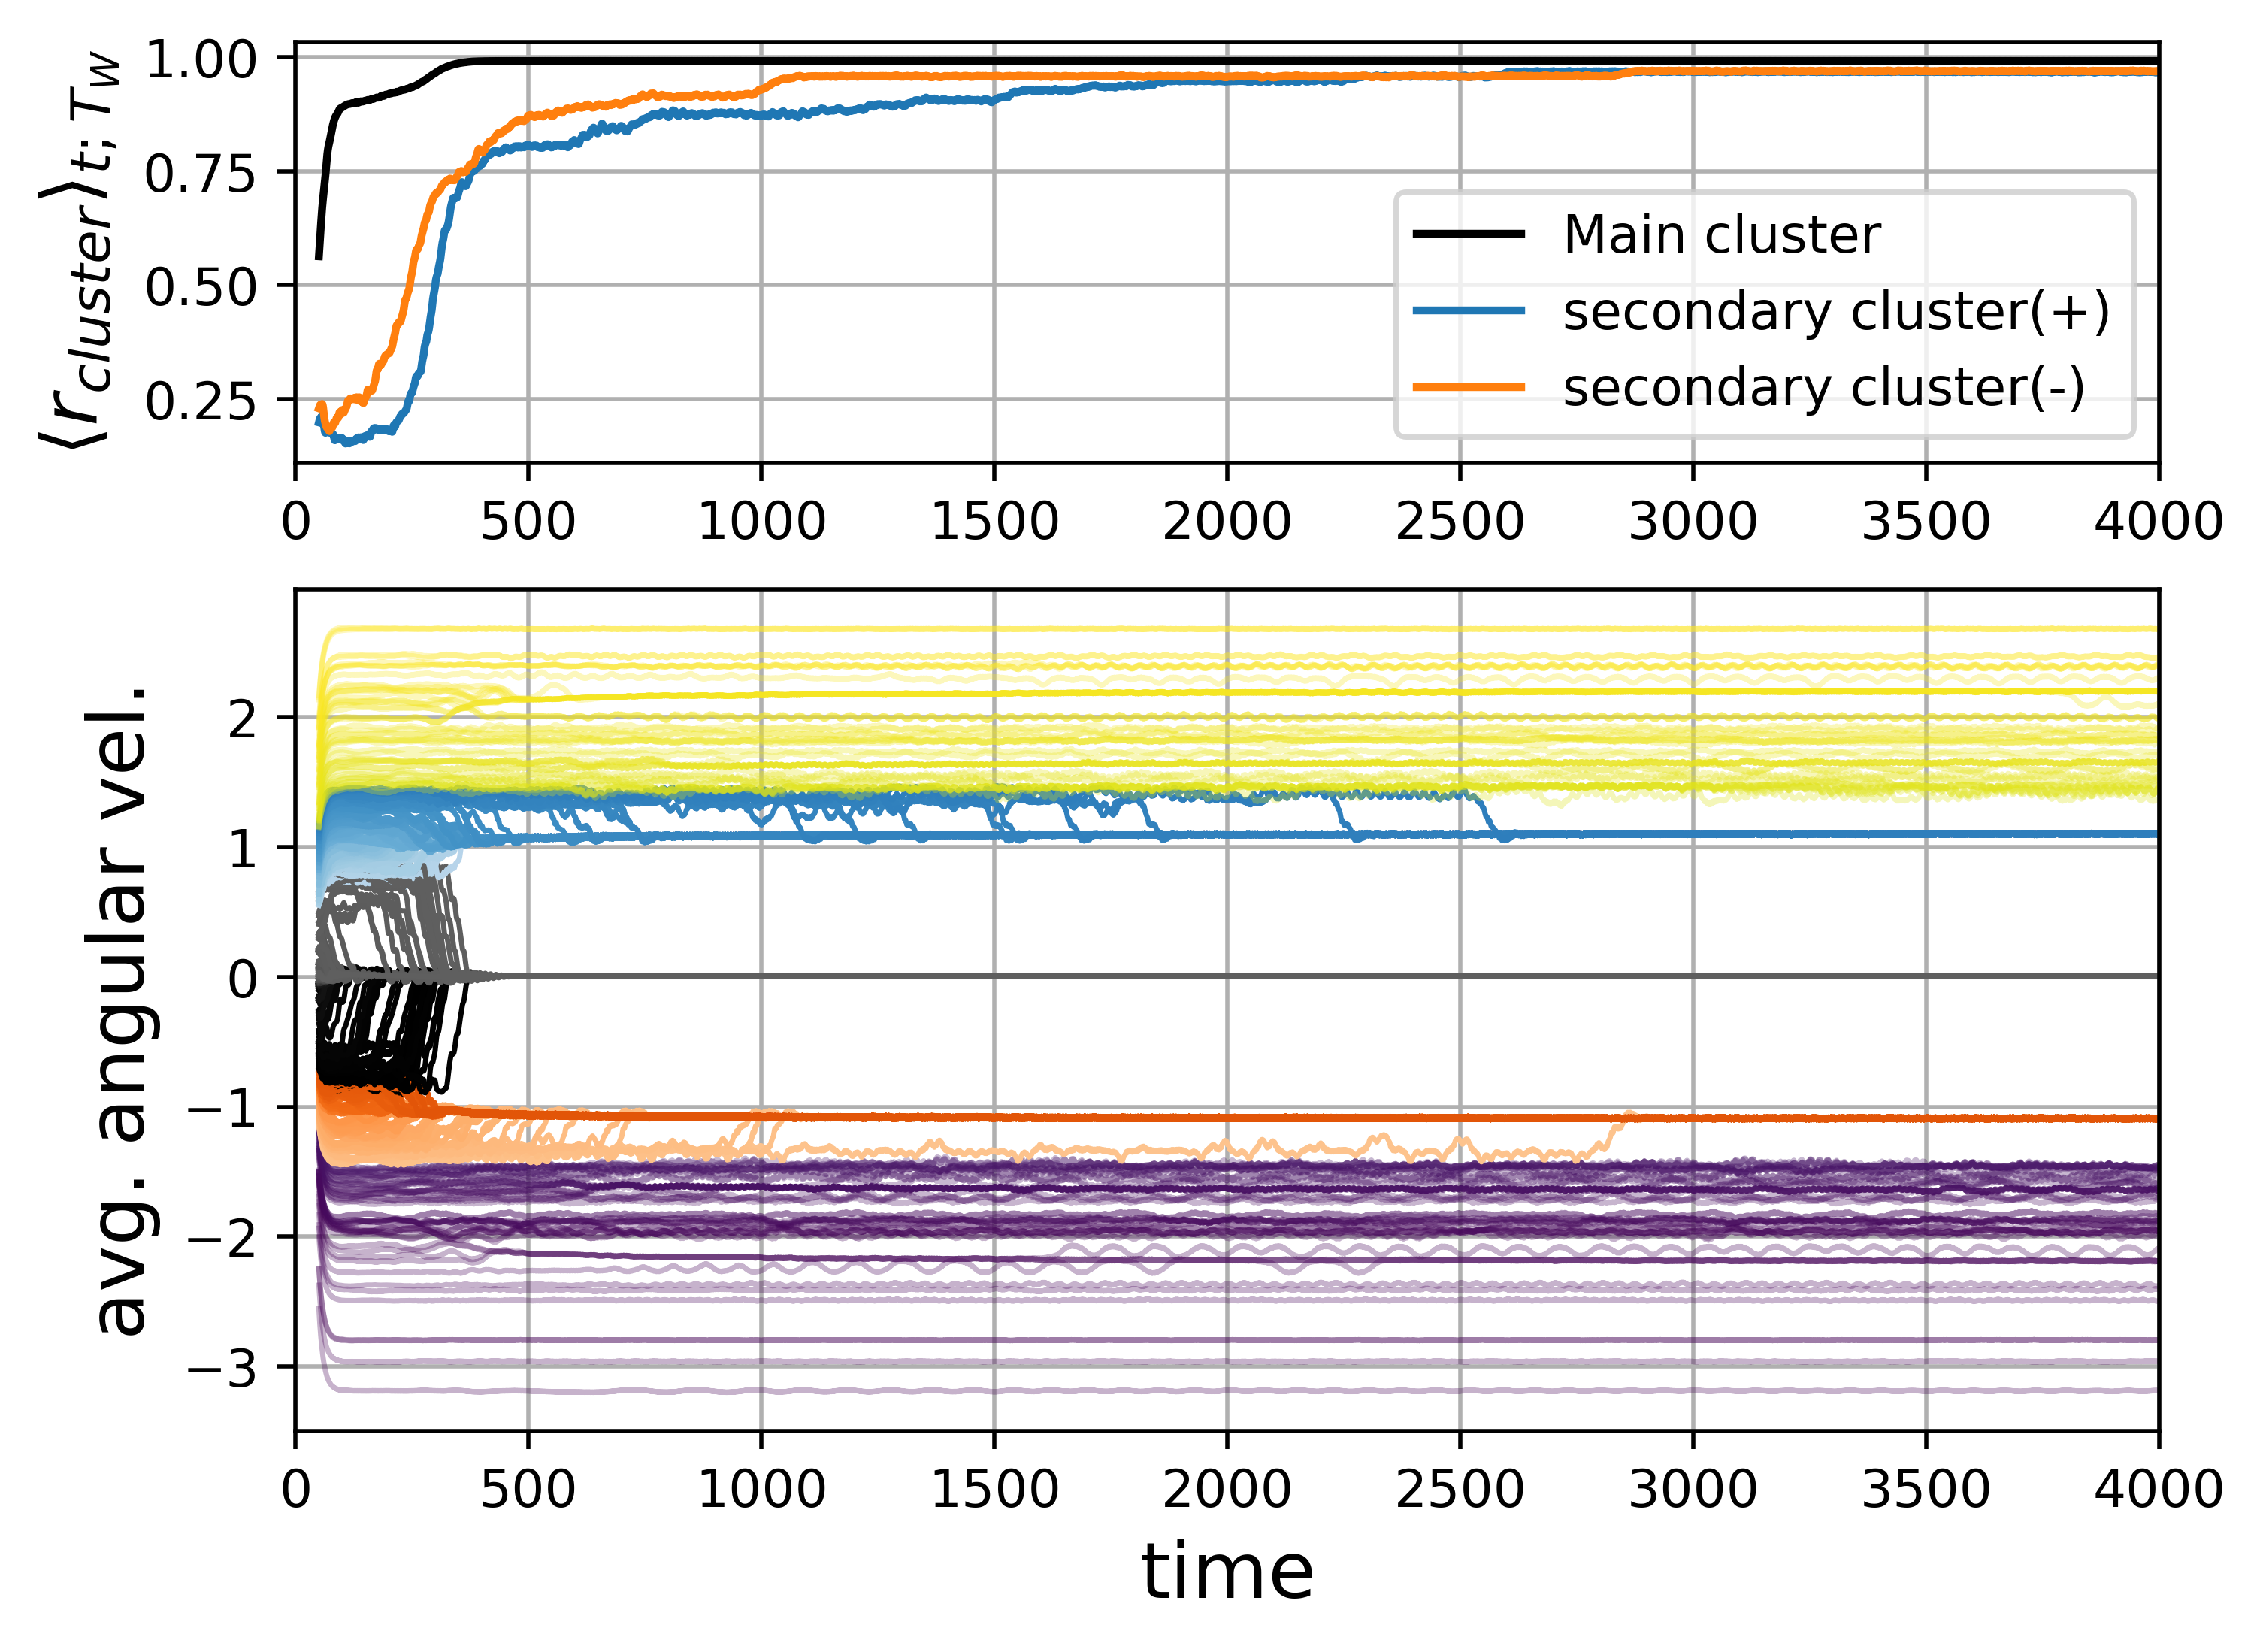

In [40]:
fig, (ax1,ax2) = plt.subplots(2,1,height_ratios=[1, 2],dpi=500)
plt.sca(ax1)
plt.plot(t[sum_time:],r1_mean,label='Main cluster',color ='black')
# plt.plot(t[sum_time:],r_clu_mean)
# plt.plot(t[sum_time:],r_mean)

# plt.axhline(CS[0]/N,ls='--',color='black')
# plt.twinx()
# plt.axhline(CS[1]/N,ls='--',color='black')
# plt.axhline(CS[2]/N,ls='--',color='black')
# plt.axhline(np.sum(CS[1:3])/N,ls='--',color='black')
plt.plot(t[sum_time:],r2_mean,label='secondary cluster(+)')
plt.plot(t[sum_time:],r3_mean,label='secondary cluster(-)')
plt.grid()
# plt.plot(t[sum_time:],r4_mean)
# plt.plot(t[sum_time:],r_nclu_mean)
# plt.plot(t[sum_time:],(r2_mean+r3_mean),label='secondary cluster')
plt.legend()
# plt.legend(loc=3)
plt.xlim(0,4000)
plt.ylabel(r'$\left\langle r_{cluster}\right\rangle_{t;T_W}$',fontsize=15)

plt.sca(ax2)
ls = plt.plot(t[sum_time:],avg_dtheta,lw=1);
color = plt.cm.viridis(np.linspace(0,1,N,endpoint=True),alpha=0.3)
for l,c in zip(ls,color):
    l.set_color(c)

color0 = plt.cm.Greys(np.linspace(0.7,1.0,CS[0],endpoint=True))
color1 = plt.cm.Blues(np.linspace(0.3,0.7,CS[1],endpoint=True))
color2 = plt.cm.Oranges_r(np.linspace(0.3,0.7,CS[2],endpoint=True))
colors = [color0,color1,color2]
i=0
for c in cluster[:3]:
    for l,c in zip(np.array(ls)[c],colors[i]):
        l.set_color(c)
    i+=1
plt.grid()
plt.xlim(0,4000)
plt.ylabel('avg. angular vel.',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.show()
# plt.plot(t[sum_time:],(r2_mean+r3_mean+r4_mean))
# plt.axhline(64,ls='--',color='black')
# plt.xlim(500,750)
# plt.axhli

(0.9, 1.0)

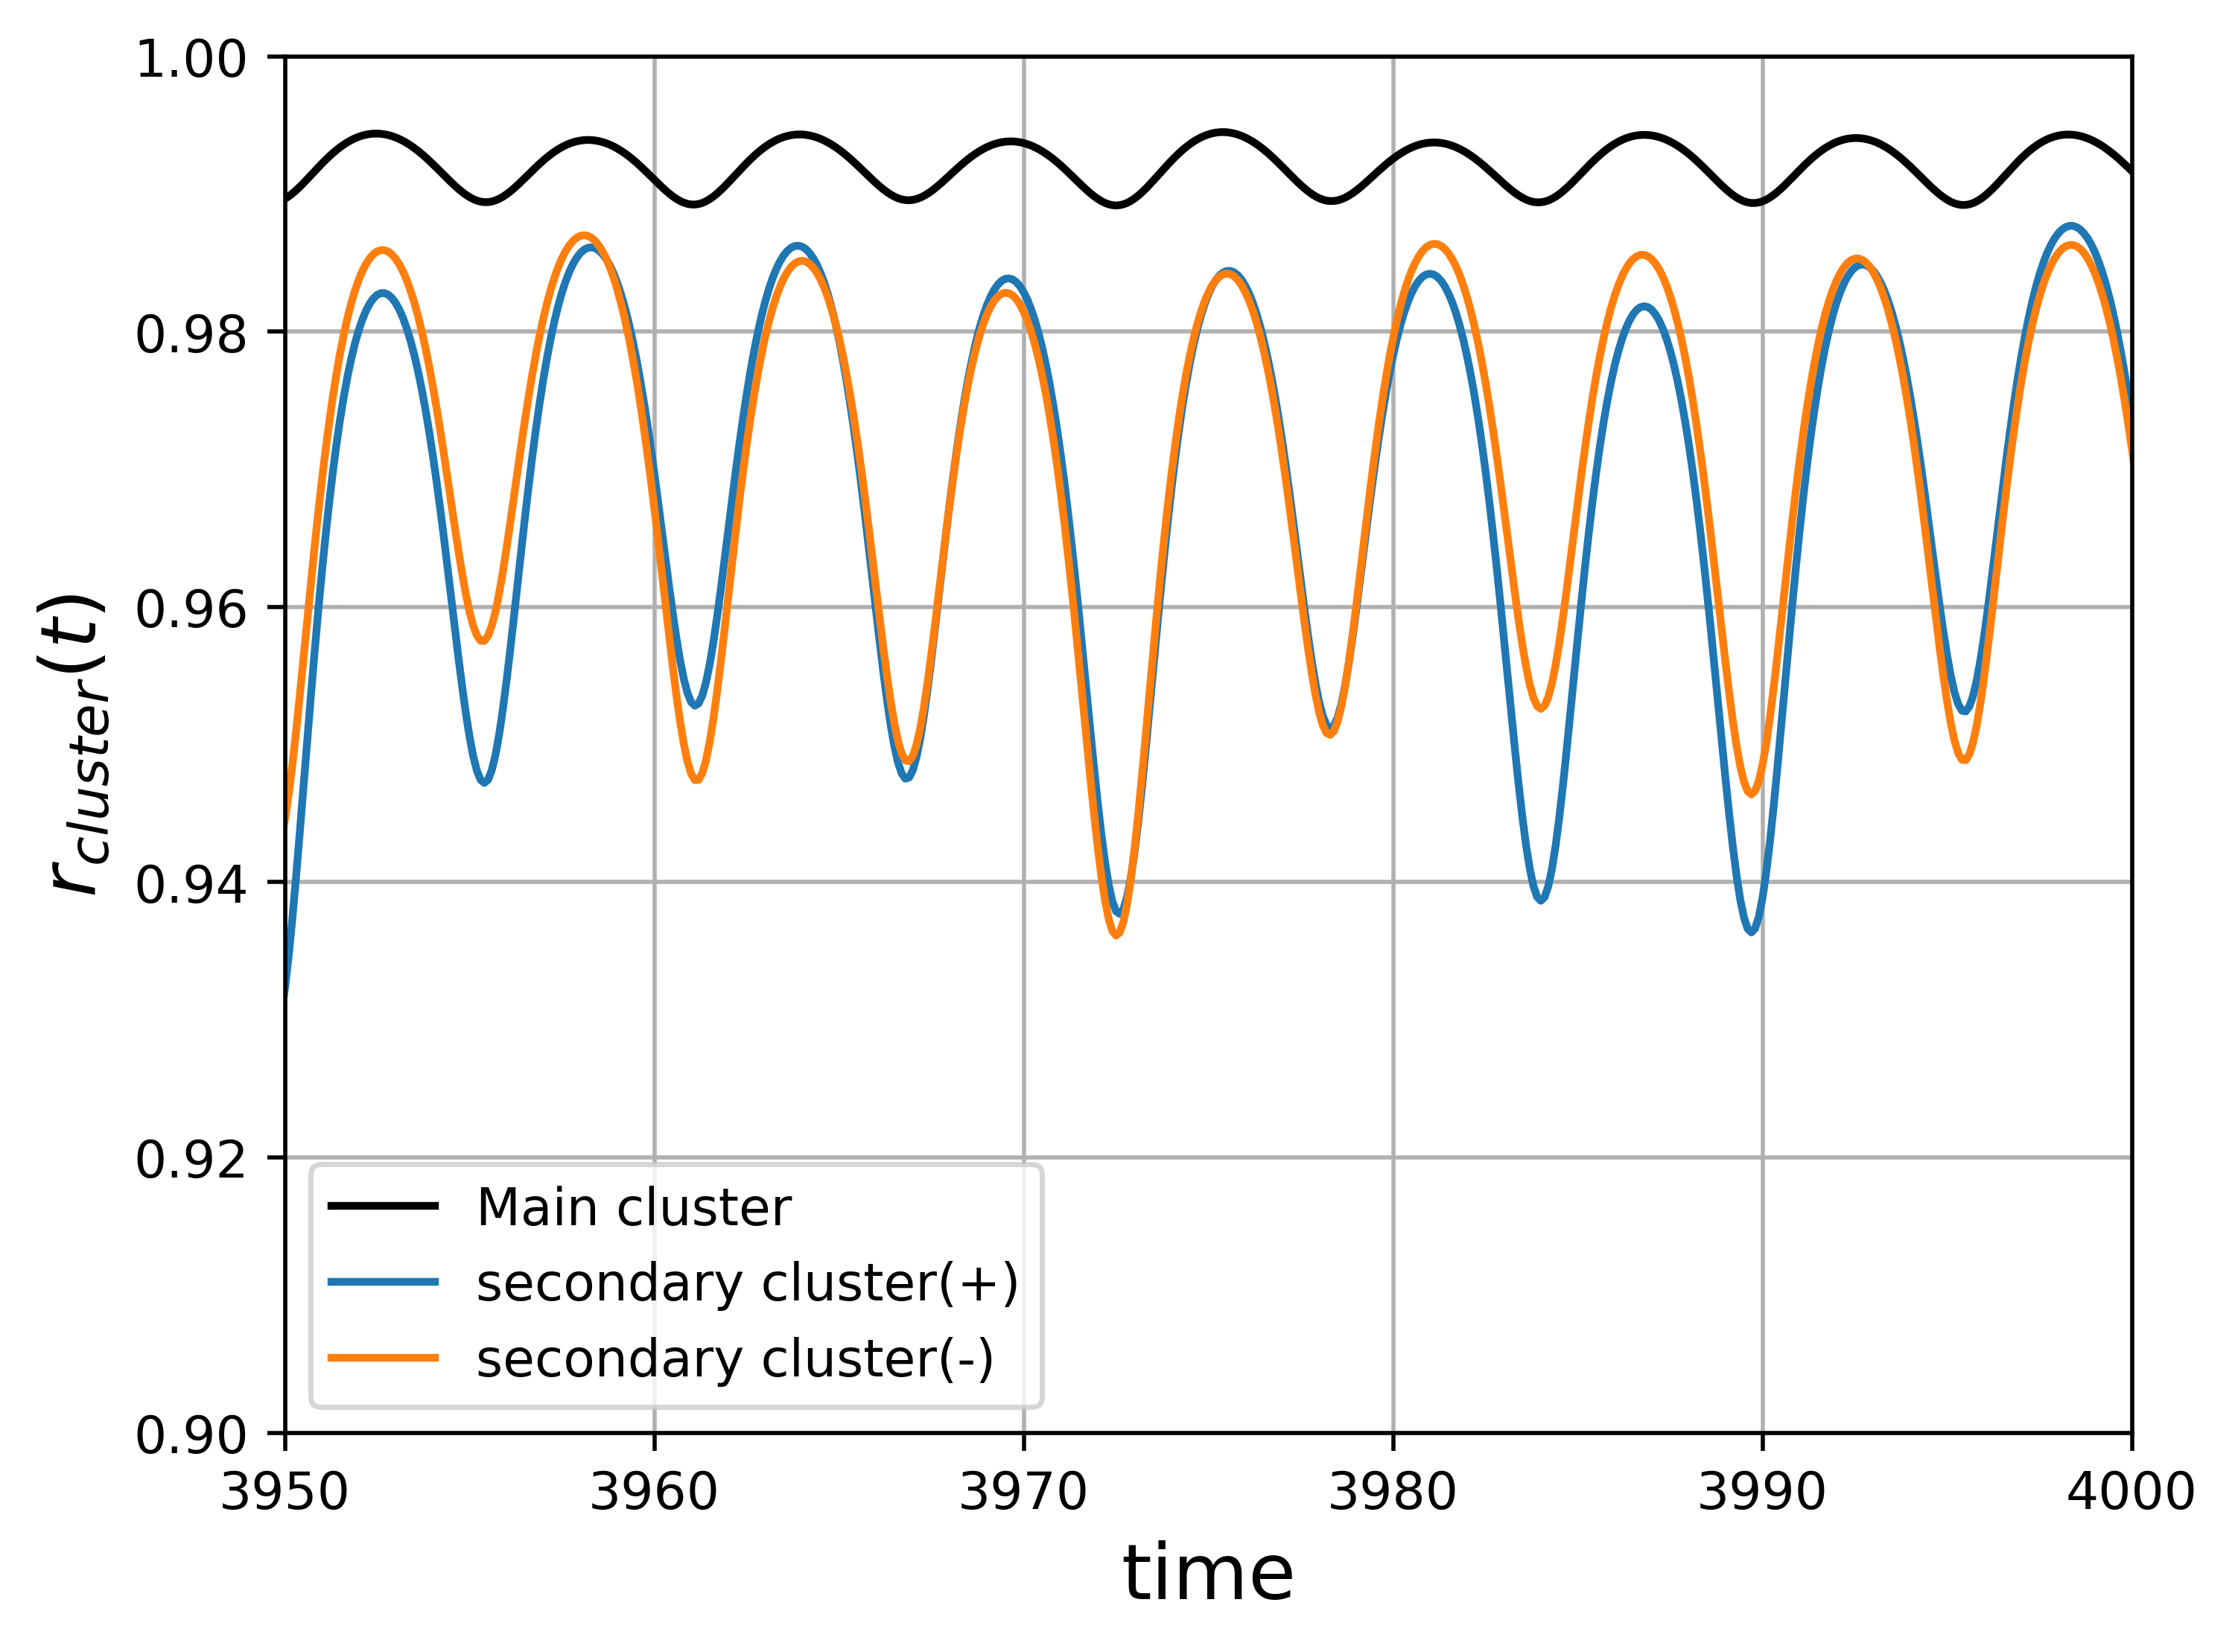

In [48]:
# fig, (ax1,ax2) = plt.subplots(2,1,height_ratios=[1, 2],dpi=500)
plt.figure(dpi=500)

plt.plot(t,r1,label='Main cluster',color ='black')
plt.plot(t,r2,label='secondary cluster(+)')
plt.plot(t,r3,label='secondary cluster(-)')
plt.grid()
plt.legend()
# plt.legend(loc=3)
plt.xlim(3950,4000)
plt.ylabel(r'$r_{cluster}(t)$',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ylim(0.90,1.0)

Text(0, 0.5, '$r_{cluster}$')

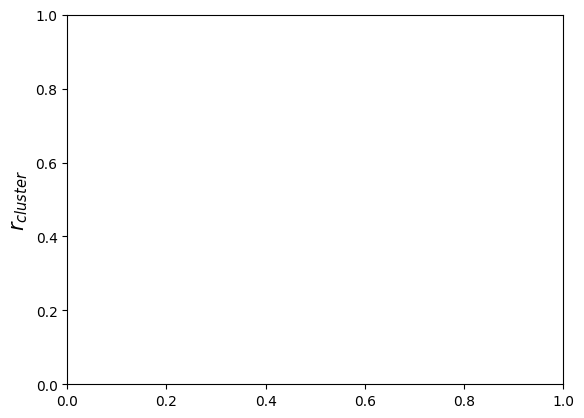

In [69]:
plt.ylabel(r'$r_{cluster}$',fontsize=15)


In [47]:

i = 0
for c in cluster[:3]:
    for c_ in c:
        ls[c_].set_color[colors[i]]
    i+=1

TypeError: 'method' object is not subscriptable

In [41]:
ls[*cluster[0]]

TypeError: list indices must be integers or slices, not tuple

(500.0, 750.0)

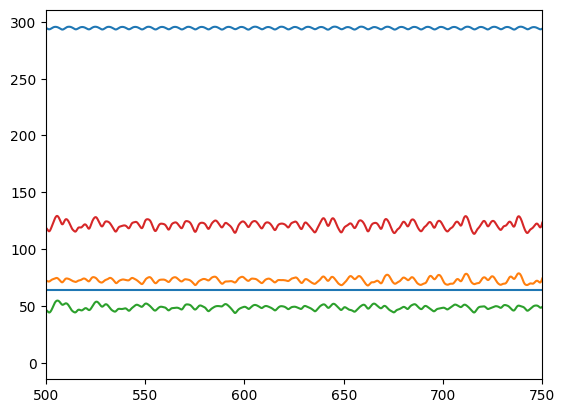

In [117]:
plt.plot(t,abs(temp)*N)
plt.plot(t,abs(temp1)*N)
plt.plot(t,abs(temp2)*N)
plt.plot(t,(abs(temp2)+abs(temp1))*N)
plt.axhline(64)
plt.xlim(500,750)
# plt.axhli

In [96]:
np.sum(CS)

889

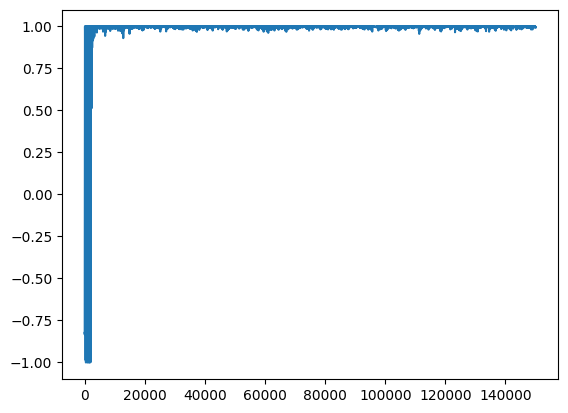

In [94]:
plt.plot(np.cos((psi2-psi1+psi3-psi1)));
# plt.xlim(4000,5000)

In [ ]:
plt.plot(t,abs(temp))
plt.plot(t,abs(temp))

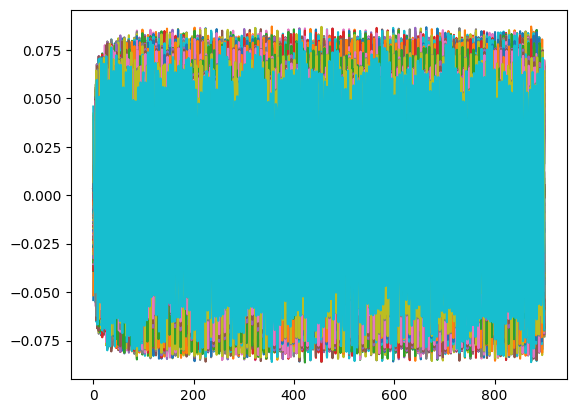

In [449]:
plt.plot(np.diff(dtheta,axis=0)[::100]);
# plt.plot(np.diff(dtheta[-1]))

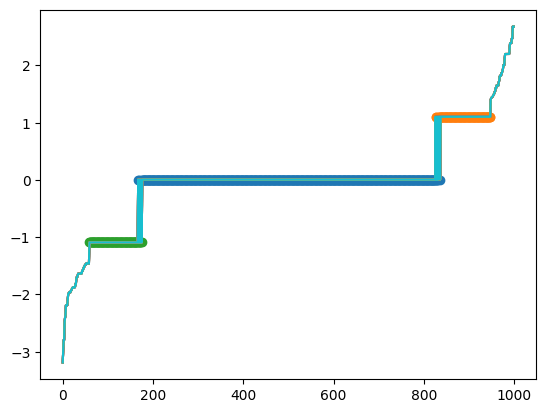

In [207]:
plt.plot(avg_dtheta[-10:].T)
for clu in cluster:
    plt.scatter(clu,avg_dtheta[-1,clu].T)

In [3]:
import numpy as np

In [4]:
1/np.zeros(10)

/var/folders/lj/v2s5sd8n1cv2xdh0yw2kf0x00000gn/T/ipykernel_86641/3462182693.py:1: RuntimeWarning: divide by zero encountered in divide
  1/np.zeros(10)


array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

# cluster의 평균 omega와, phase velocity